In [867]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

       revision_time  exam_score
count      50.000000   50.000000
mean       22.220020   49.919860
std        13.986112   20.925594
min         2.723000   14.731000
25%         8.570500   32.125000
50%        21.688000   47.830500
75%        32.257500   65.069750
max        48.011000   94.945000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
revision_time    50 non-null float64
exam_score       50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes
None
    revision_time  exam_score
0           2.723      27.682
1           2.844      22.998
2           3.303      19.765
3           3.588      24.481
4           4.050      22.974
5           4.080      27.086
6           5.674      26.136
7           6.060      27.038
8           6.347      31.283
9           6.819      14.731
10          7.098      28.946
11          7.515      26.901
12          8.356      35.299
13          9.214      24.228
14         10.364      34.

/Users/alasdair/miniconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


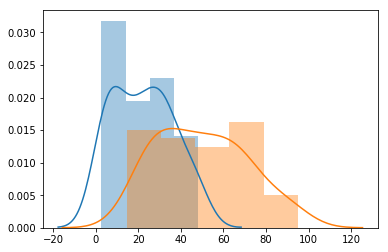

In [751]:
exams = pd.read_csv("./data/regression_part1.csv")
print(exams.describe())
print("")
print(exams.info())
print(exams)

sns.distplot(exams["revision_time"].values)
sns.distplot(exams["exam_score"].values)

In [752]:
exams_X = np.asarray(exams["revision_time"].values)
print(exams_X.shape)
exams_phi = np.column_stack((np.ones(exams_X.shape[0]), exams_X))

exams_y = exams["exam_score"].values

lr = LinearRegression(fit_intercept=False)
lr.fit(exams_phi, exams_y)
lr.coef_

(50,)


array([17.89768026,  1.44114091])

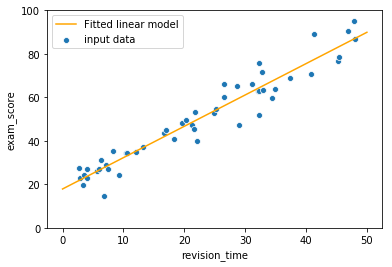

In [753]:
plot = sns.scatterplot(data=exams, x="revision_time", y="exam_score", label="input data")
x = np.linspace(0,50,2)
y = (1.44114091*x) + 17.89768026
sns.lineplot(x=x, y=y, color="orange", label="Fitted linear model")
plt.ylim(0, 100)
plot.figure.savefig("output.png")

In [754]:
X = np.asarray(exams["revision_time"].values)
phi = np.column_stack((np.ones(50), X))
y = exams["exam_score"].values
w = (np.linalg.inv((phi.transpose().dot(phi)))).dot(phi.transpose()).dot(y)
w

array([17.89768026,  1.44114091])

In [755]:
# (1) f.
sk_preds = lr.predict(exams_phi)
sk_error = (sk_preds - y)
sk_squared_error = sk_error**2
sk_mse = np.mean(sk_squared_error)
print("MSE with sklearn was {}".format(sk_mse))


maf_preds = (X*1.44114091) + 17.89767026
maf_error = maf_preds - y
maf_squared_error = maf_error**2
maf_mse = np.mean(maf_squared_error)
print("MSE with maths was {}".format(maf_mse))


MSE with sklearn was 30.9854726145413
MSE with maths was 30.985472614639242


[[1.35353535]]


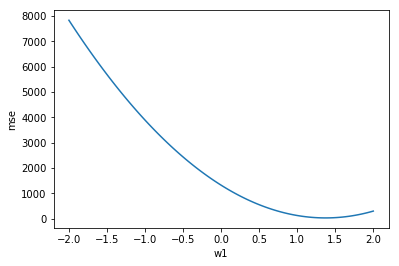

In [756]:
#1. g
w1 = np.linspace(-2, 2, 100).reshape(100, 1)
all_preds = w1*X + 20
all_mse = np.mean((all_preds - y)**2, 1)
print(w1[all_mse==min(all_mse)])
mse_df = pd.DataFrame({"w1":w1.flatten(), "mse":all_mse})
plt = sns.lineplot(data=mse_df, x="w1", y="mse")
plt.figure.savefig("1gFig.png")

(25,)
    input  output
0   2.728   9.088
1   3.244  12.786
2  -4.164 -10.016
3   4.875  32.976
4   3.329  10.437
5   4.268  21.681
6  -2.879  -5.204
7  -2.276  -1.465
8   2.688   8.539
9   2.780   6.929
10  3.874  15.765
11 -4.826 -15.577
12  2.633  11.382
13  2.815   9.853
14  4.441  24.914
15  1.345   3.977
16 -4.616 -15.291
17  1.405  -0.154
18 -2.588  -0.988
19  0.992  -1.133
20  3.276  10.743
21 -0.597   0.536
22 -3.772  -6.342
23 -2.848  -1.673
24  4.310  25.919


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

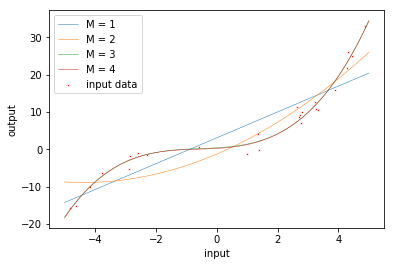

In [757]:
#2. a
exams_2 = pd.read_csv("./data/regression_part2.csv")
X = np.asarray(exams_2["input"].values)
print(X.shape)
phi = np.column_stack((np.ones(25), X))
print(exams_2)
exams_2_X = np.asarray(exams_2["input"].values)
exams_2_phi = np.column_stack((np.ones(exams_2_X.shape[0]), exams_2_X))
exams_2_y = exams_2["output"].values


x = np.linspace(-5,5,100)
x = x.reshape(100, 1)

poly_1 = PolynomialFeatures(degree=1, include_bias=True)
poly_2 = PolynomialFeatures(degree=2, include_bias=True)
poly_3 = PolynomialFeatures(degree=3, include_bias=True)
poly_4 = PolynomialFeatures(degree=4, include_bias=True)
phi_1 = poly_1.fit_transform(X.reshape(25, 1))
phi_2 = poly_2.fit_transform(X.reshape(25, 1))
phi_3 = poly_3.fit_transform(X.reshape(25, 1))
phi_4 = poly_4.fit_transform(X.reshape(25, 1))
x_1 = poly_1.fit_transform(x)
x_2 = poly_2.fit_transform(x)
x_3 = poly_3.fit_transform(x)
x_4 = poly_4.fit_transform(x)

plot = sns.scatterplot(data=exams_2, x="input", y="output", label="input data", color="red", s=5)

lr = LinearRegression(fit_intercept=False)
lr.fit(phi, exams_2_y)
y_1 = lr.predict(x_1)
sns.lineplot(x=x.flatten(), y=y_1.flatten(), label="M = 1", linewidth=0.5)

lr_2 = LinearRegression(fit_intercept=False)
lr_2.fit(phi_2, exams_2_y)
y_2 = lr_2.predict(x_2)
sns.lineplot(x=x.flatten(), y=y_2.flatten(), label = "M = 2", linewidth=0.5)

lr_3 = LinearRegression(fit_intercept=False)
lr_3.fit(phi_3, exams_2_y)
y_3 = lr_3.predict(x_3)
sns.lineplot(x=x.flatten(), y=y_3.flatten(), label = "M = 3", linewidth=0.5)

lr_4 = LinearRegression(fit_intercept=False)
lr_4.fit(phi_4, exams_2_y)
y_4 = lr_4.predict(x_4)
sns.lineplot(x=x.flatten(), y=y_4.flatten(), label = "M = 4", linewidth=0.5)

plt.savefig("./2aFig.png", dpi=100)


In [ ]:
## 2.b
exams_2_y = exams_2["output"].values

pred_1 = lr.predict(phi_1)
mse_1 = np.mean((pred_1 - exams_2_y)**2)

pred_2 = lr_2.predict(phi_2)
mse_2 = np.mean((pred_2 - exams_2_y)**2)

pred_3 = lr_3.predict(phi_3)
mse_3 = np.mean((pred_3 - exams_2_y)**2)

pred_4 = lr_4.predict(phi_4)
mse_4 = np.mean((pred_4 - exams_2_y)**2)

poly_mse = pd.DataFrame.from_dict({"mse_1":[mse_1], "mse_2":[mse_2], "mse_3":[mse_3], "mse_4":[mse_4]})
print(poly_mse)
sns.barplot(data=poly_mse)
plt.savefig("./2bFig.png", dpi=100)

In [ ]:
#2.d
X = exams_2["input"].values

def rbf(x, c, a):
    return np.exp(-0.5*(x - c)**2/a**2)

def apply_rbf(xx, cc, aa):
    return np.insert(rbf(xx.reshape(xx.size, 1), cc, aa.reshape(aa.size, 1, 1)), 0, 1, axis=2)

phis = apply_rbf(X, np.array([-4, -2, 2, 4]), np.array([0.2, 100, 1000]))
x_rbf = apply_rbf(x.flatten(), np.array([-4, -2, 2, 4]), np.array([0.2, 100, 1000]))
#print(phis[0])
lr_rbf_1 = LinearRegression(fit_intercept=False)
lr_rbf_1.fit(phis[0], exams_2_y)
y_rbf_1 = lr_rbf_1.predict(x_rbf[0])

lr_rbf_2 = LinearRegression(fit_intercept=False)
lr_rbf_2.fit(phis[1], exams_2_y)
y_rbf_2 = lr_rbf_2.predict(x_rbf[1])

lr_rbf_3 = LinearRegression(fit_intercept=False)
lr_rbf_3.fit(phis[2], exams_2_y)
y_rbf_3 = lr_rbf_3.predict(x_rbf[2])

sns.lineplot(x=x.flatten(), y=y_rbf_1.flatten(), label="a=0.2", linewidth=0.5)
sns.lineplot(x=x.flatten(), y=y_rbf_2.flatten(), label="a=100", linewidth=0.5)
sns.lineplot(x=x.flatten(), y=y_rbf_3.flatten(), label="a=1000", linewidth=0.5)
lr_rbf_2.predict(np.array([np.insert(np.exp(-0.5*(4 - np.array([-4, -2, 2, 4]))**2/100**2), 0, 1)]))
print(x_rbf[0][0])
np.exp(-0.5*(-5+4)**2/0.2**2)

In [ ]:
input = exams_2["input"].values.reshape(25, 1)
output = exams_2["output"].values
linspace = np.linspace(-5, 5, 100).reshape(100, 1)
plot = sns.scatterplot(data=exams_2, x="input", y="output", label="input data", color="red", s=5)

def rbf(x, c, a):
    return np.exp(-0.5*(x - c)**2/a**2)

#rbf_1
input_rbf_1 = rbf(input, np.array([-4, -2, 2, 4]), 0.2)
input_rbf_1 = np.insert(input_rbf_1, 0, 1, axis=1)

lr_rbf_1 = LinearRegression(fit_intercept=False)
lr_rbf_1.fit(input_rbf_1, output)
#print(input_rbf_1)
#print(input)
#print(np.exp(-0.5*(2.728+4)**2/0.2**2))

linspace_rbf_1 = rbf(linspace, np.array([-4, -2, 2, 4]), 0.2)
linspace_rbf_1 = np.insert(linspace_rbf_1, 0, 1, axis=1)
#print(linspace_rbf_1)
#print(np.exp(-0.5*(-5+4)**2/0.2**2))
y_rbf_1 = lr_rbf_1.predict(linspace_rbf_1)
sns.lineplot(x=linspace.flatten(), y=y_rbf_1.flatten(), label="a=0.2")


#rbf_2
input_rbf_2 = rbf(input, np.array([-4, -2, 2, 4]), 100)
input_rbf_2 = np.insert(input_rbf_2, 0, 1, axis=1)

lr_rbf_2 = LinearRegression(fit_intercept=False)
lr_rbf_2.fit(input_rbf_2, output)

linspace_rbf_2 = rbf(linspace, np.array([-4, -2, 2, 4]), 100)
linspace_rbf_2 = np.insert(linspace_rbf_2, 0, 1, axis=1)

y_rbf_2 = lr_rbf_2.predict(linspace_rbf_2)
sns.lineplot(x=linspace.flatten(), y=y_rbf_2.flatten(), label="a=100")


#rbf_3
input_rbf_3 = rbf(input, np.array([-4, -2, 2, 4]), 1000)
input_rbf_3 = np.insert(input_rbf_3, 0, 1, axis=1)

lr_rbf_3 = LinearRegression(fit_intercept=False)
lr_rbf_3.fit(input_rbf_3, output)

linspace_rbf_3 = rbf(linspace, np.array([-4, -2, 2, 4]), 1000)
linspace_rbf_3 = np.insert(linspace_rbf_3, 0, 1, axis=1)

y_rbf_3 = lr_rbf_3.predict(linspace_rbf_3)
sns.lineplot(x=linspace.flatten(), y=y_rbf_3.flatten(), label="a=1000")

plt.savefig("./2dFig.png", dpi=100)
plt.ylim(-30, 30)
plt.savefig("./2dFig2.png", dpi=100)

lr_rbf_1.predict(np.array([linspace_rbf_1[51]]))

In [ ]:
#3.a
faces_train = pd.read_csv("./data/faces_train_data.csv").drop(columns=["smiling"])
faces_test = pd.read_csv("./data/faces_test_data.csv").drop(columns=["smiling"])
smiling_train = pd.read_csv("./data/faces_train_data.csv")[["smiling"]]
smiling_test = pd.read_csv("./data/faces_test_data.csv")[["smiling"]]

sns.distplot(faces_train["y2"])

print(faces_test.describe())
print(faces_train.describe())

[-1.92372819 -1.91154564 -1.84506491 -1.7272499  -1.53575984 -1.24699108
 -0.88232454 -0.46050426  0.02846126  0.5206787   0.94556349  1.31386288
  1.60344341  1.78636917  1.89132535  1.94092819  1.93935375 -1.54916349
 -1.31369006 -1.00695091 -0.69324503 -0.40142799  0.33693266  0.63187789
  0.95006369  1.26618296  1.51184949 -0.02475619 -0.02216592 -0.02074604
 -0.01879108 -0.39399757 -0.21125233 -0.00721298  0.19807627  0.38045639
 -1.20388925 -0.98686856 -0.7324215  -0.51316714 -0.74172698 -0.99324706
  0.47972617  0.69705274  0.95448803  1.17643164  0.96558783  0.71342556
 -0.68628925 -0.44430548 -0.18105639  0.          0.18120041  0.45464665
  0.70874402  0.47488884  0.21935984  0.00892657 -0.20052576 -0.4527785
 -0.58856024 -0.18480446  0.00244219  0.19183408  0.60909371  0.1992499
  0.0043931  -0.18824016]


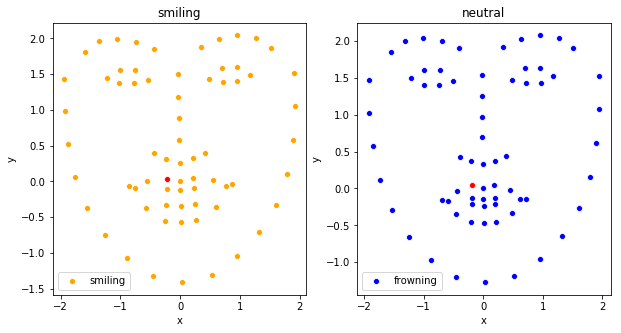

In [823]:
#3.b
xs = np.array([True, False])
xs = np.tile(xs, 68)
xs = faces_train.columns[xs].values
faces_x = faces_train[xs]

ys = np.array([False, True])
ys = np.tile(ys, 68)
ys = faces_train.columns[ys].values
faces_y = faces_train[ys]

faces_y_smiling_mean = faces_y.iloc[(smiling_train == 1).values.flatten()].mean(axis=0).values
faces_x_smiling_mean = faces_x.iloc[(smiling_train == 1).values.flatten()].mean(axis=0).values
faces_y_frowning_mean = faces_y.iloc[(smiling_train == 0).values.flatten()].mean(axis=0).values
faces_x_frowning_mean = faces_x.iloc[(smiling_train == 0).values.flatten()].mean(axis=0).values
print(faces_x_frowning_mean)

#plt.scatter(x=faces_x_smiling_mean, y=faces_y_smiling_mean, color="orange", label="smiling")
#plt.scatter(x=faces_x_frowning_mean, y=faces_y_frowning_mean, color="blue", label="frowning")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

faces_smiling = pd.DataFrame.from_dict({"x": faces_x_smiling_mean, "y": faces_y_smiling_mean})
faces_neutral = pd.DataFrame.from_dict({"x": faces_x_frowning_mean, "y": faces_y_frowning_mean})
sns.scatterplot(data=faces_smiling, x="x", y="y", color="orange", label="smiling", ax=axs[0])
sns.scatterplot(data=faces_neutral, x="x", y="y", color="blue", label="frowning", ax=axs[1])

axs[0].title.set_text("smiling")
axs[1].title.set_text("neutral")
plt.subplots_adjust(hspace=0.3)

plt.savefig("3bFig.png")

sns.scatterplot(x=[faces_smiling["x"][50]], y=[faces_smiling["y"][50]], color="red", ax=axs[0])
sns.scatterplot(x=[faces_neutral["x"][50]], y=[faces_neutral["y"][50]], color="red", ax=axs[1])

In [826]:
dt_2 = DecisionTreeClassifier(random_state=2001, max_depth=2)
dt_8 = DecisionTreeClassifier(random_state=2001, max_depth=8)
dt_20 = DecisionTreeClassifier(random_state=2001, max_depth=20)

dt_2.fit(faces_train, smiling_train)
dt_8.fit(faces_train, smiling_train)
dt_20.fit(faces_train, smiling_train)

dt_2_tr_ac = dt_2.score(faces_train, smiling_train).round(5)
dt_2_te_ac = dt_2.score(faces_test, smiling_test).round(5)
dt_2_md = dt_2.tree_.max_depth
dt_8_tr_ac = dt_8.score(faces_train, smiling_train).round(5)
dt_8_te_ac = dt_8.score(faces_test, smiling_test).round(5)
dt_8_md = dt_8.tree_.max_depth
dt_20_tr_ac = dt_20.score(faces_train, smiling_train).round(5)
dt_20_te_ac = dt_20.score(faces_test, smiling_test).round(5)
dt_20_md = dt_20.tree_.max_depth

print("dt_2 (where dt_n is a tree generated with max depth set to n) has depth of {}, training acccuracy of {}, and test accuracy of {}".format(
    dt_2_md, dt_2_tr_ac, dt_2_te_ac))
print("dt_8 has depth of {}, training acccuracy of {}, and test accuracy of {}".format(
    dt_8_md, dt_8_tr_ac, dt_8_te_ac))
print("dt_20 has depth of {}, training acccuracy of {}, and test accuracy of {}".format(
    dt_20_md, dt_20_tr_ac, dt_20_te_ac))

imps = np.array(dt_8.feature_importances_)
imps_max_idxs = imps.argsort()[-3:][::-1]
print(imps)
print(imps_max_idxs/2)
print(imps[imps_max_idxs])


column_names = faces_train.columns.values
dot_data = export_graphviz(dt_8, out_file=None, 
    feature_names=column_names,  
    class_names=["0", "1"],  
    filled=True, rounded=True,  
    special_characters=False)
graph = graphviz.Source(dot_data)
#graph

dt_2 (where dt_n is a tree generated with max depth set to n) has depth of 2, training acccuracy of 0.79479, and test accuracy of 0.78167
dt_8 has depth of 8, training acccuracy of 0.93354, and test accuracy of 0.84083
dt_20 has depth of 17, training acccuracy of 1.0, and test accuracy of 0.81583
[0.         0.00171789 0.00424141 0.00931392 0.00099457 0.
 0.00800374 0.         0.         0.         0.00554869 0.
 0.         0.         0.         0.03554359 0.         0.03275378
 0.         0.00569425 0.         0.         0.         0.00097483
 0.         0.00294131 0.         0.         0.00221963 0.00251957
 0.         0.         0.         0.         0.00250062 0.
 0.00097417 0.00585508 0.         0.         0.00195484 0.
 0.         0.00158038 0.00078737 0.00285785 0.00087485 0.
 0.         0.00481308 0.         0.         0.         0.0015585
 0.         0.         0.         0.00136318 0.         0.08831447
 0.         0.0053233  0.         0.00246417 0.00095745 0.01742446
 0.   

In [873]:
eval = pd.read_csv("./data/classification_eval_1.csv")
preds = eval.round(decimals=0).drop(columns=["gt"])
gt = eval.drop(columns=["alg_1", "alg_2", "alg_3", "alg_4"])
accs = ((preds.values - gt.values)**2).mean(axis=0)*100
print("The accuracies as percentages are as follows:\\newline alg\\_1: ${}$, alg\\_2: ${}$, alg\\_3: ${}$, alg\\_4: ${}$".format(
    accs[0], accs[1], accs[2], accs[3]))

print(gt[gt["gt"] == 1].shape)
print(gt[gt["gt"] == 0].shape)
accs

The accuracies as percentages are as follows:\newline alg\_1: $38.4$, alg\_2: $45.0$, alg\_3: $67.9$, alg\_4: $67.10000000000001$
(202, 1)
(798, 1)


array([38.4, 45. , 67.9, 67.1])

In [864]:
auc_1 = roc_auc_score(eval["gt"].values, eval["alg_1"].values).round(5)
auc_2 = roc_auc_score(eval["gt"].values, eval["alg_2"].values).round(5)
auc_3 = roc_auc_score(eval["gt"].values, eval["alg_3"].values).round(5)
auc_4 = roc_auc_score(eval["gt"].values, eval["alg_4"].values).round(5)

print("The auc scores are as follows:\\newline alg\\_1: ${}$, alg\\_2: ${}$, alg\\_3: ${}$, alg\\_4: ${}$".format(
    auc_1, auc_2, auc_3, auc_4))


The auc scores are as follows:\newline alg\_1: $0.73209$, alg\_2: $0.63163$, alg\_3: $0.06395$, alg\_4: $0.84739$


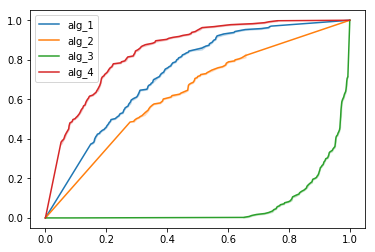

In [872]:
roc_1 = roc_curve(eval["gt"].values, eval["alg_1"].values)
roc_2 = roc_curve(eval["gt"].values, eval["alg_2"].values)
roc_3 = roc_curve(eval["gt"].values, eval["alg_3"].values)
roc_4 = roc_curve(eval["gt"].values, eval["alg_4"].values)
sns.lineplot(x=roc_1[0], y=roc_1[1], label="alg_1")
sns.lineplot(x=roc_2[0], y=roc_2[1], label="alg_2")
sns.lineplot(x=roc_3[0], y=roc_3[1], label="alg_3")
sns.lineplot(x=roc_4[0], y=roc_4[1], label="alg_4")
plt.savefig("./lastQ.png")